<h1>Analytics of titanic data</h1>
<h2>#0 : Preparation</h2>

<h3>#0_1 : Import Libraries</h3>

In [1]:
### Import necessary libraries
import glob                     # Library to read data
import numpy as np              # Library to handle arrays
import pandas as pd             # Library to process data
import matplotlib.pyplot as plt # Library for displaying graphs
import seaborn as sns           # Library for displaying graphs

### Libraries for model training and evaluation
from sklearn.preprocessing import StandardScaler # Class to standardize numeric data
from sklearn.preprocessing import MinMaxScaler # Class to normalize numeric data
from sklearn.tree import DecisionTreeClassifier, plot_tree  # Classes for using decision tree algorithm and visualizing decision trees
from sklearn.model_selection import train_test_split # Function to split data into training and test sets
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score # Functions to evaluate decision tree models
import lightgbm as lgb # Class to create lightGBM models
from sklearn.linear_model import LinearRegression # Class to create linear regression models
from sklearn.metrics import mean_squared_error, r2_score # Classes to evaluate linear regression models

<h3>#0_2 : Display Settings</h3>

In [2]:
### Set the number of decimal places to display
np.set_printoptions(precision = 3)
pd.options.display.precision = 3

### Display all data in pandas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

<h3>#0_3 : Data Import</h3>

In [3]:
# GoogleColab
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


<p>After executing the above, select the folder > content > drive > MyDrive, click the three-dot menu, and copy the path.</p>


In [4]:
# Specify the file path of the data to be imported
file_path = '/content/drive/MyDrive/python_code/titanic_dataset.csv'

<p>To work with the Pandas library, load the table data into a Pandas DataFrame.</p>

```
# Load the table data using the Pandas library
df = pd.read_csv(file_path)

In [5]:
# [Practice] Let's load the table data into df
df = pd.read_csv(file_path)

In [ ]:
# If not using Google Colab, read the file using glob

def get_analy_data(file_name="*data_titanic*.xlsx"):
    """
    Retrieve analysis data (needs to be rewritten for Google Colab distribution)
    Args:
        file_name: Name of the analysis file
    Returns: 
        df: DataFrame of the analysis file
    """
    files = glob.glob(file_name)
    df = pd.read_excel(files[0]) # Retrieve the raw data
    return df


In [ ]:
df = get_analy_data(file_name="*data_titanic*.xlsx")

<h2>#1 : Data Inspection</h2>

<h3>#1_1 : Display Basic Data Information</h3>

<p>Check various information about the table data.</p>
<p>Review the information and consider necessary processing or analysis.</p>

```
df.info()
```



In [6]:
# [Practice] Let's output the basic information of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<p>For example, in this dataset, the following information can be confirmed:</p>
<p>-------------------</p>
<p>Total rows: 891</p>
<p>Total columns: 12</p>

<ul>
    <li>PassengerId: 891 rows, 0 missing values, data type int64</li>
    <li>Survived: 891 rows, 0 missing values, data type int64</li>
    <p>........</p>
</ul>

<p>データ型の概要</p>
<ul>
    <li>int64: 64ビットの整数型で構成される列</li>
    <li>object: 文字列、リストなどのデータ型で構成される列</li>
    <li>float64: 64ビットの浮動小数型で構成される列</li>
</ul>

<h3>#1_2 : データサンプルの表示</h3>

<p>上位n件のデータを表示して、データの概要を確認する</p>


```
# nに表示件数指定する（空欄の場合は上位5件）

df.head(n)
```



In [7]:
# 【実践】dfの先頭10件のデータを表示してみましょう
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.458,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.862,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.133,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.071,NaN,C


<p>各項目の内容は以下の通り</p>
<ul>
    <li>PassengerId : 乗客の識別ID。各乗客にユニークな番号が割り当てられています</li>
    <li>Survived : 生存状態（0は非生存、1は生存）</li>
    <li>Pclass : チケットのクラス（1が一等、2が二等、3が三等）</li>
    <li>Name : 乗客の名前</li>
    <li>Sex : 乗客の性別</li>
    <li>Age : 乗客の年齢</li>
    <li>SibSp : 同乗している兄弟姉妹または配偶者の数</li>
    <li>Parch : 同乗している親または子どもの数</li>
    <li>Ticket : チケット番号</li>
    <li>Fare : 運賃</li>
    <li>Cabin : 客室番号</li>
    <li>Embarked : 乗船した港（Cはシェルブール（Cherbourg）、Qはクイーンズタウン（Queenstown、現在のコーブ）、Sはサウサンプトン（Southampton））</li>
</ul>

<h3>#1_3 : データ統計量の表示</h3>

<p>数値データの統計量を確認する</p>
<p>各列の構成を確認し、必要な処理を検討する</p>



```
df.describe()
```



In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000,891.000,891.000,714.000,891.000,891.000,891.000
mean,446.000,0.384,2.309,29.699,0.523,0.382,32.204
std,257.354,0.487,0.836,14.526,1.103,0.806,49.693
min,1.000,0.000,1.000,0.420,0.000,0.000,0.000
25%,223.500,0.000,2.000,20.125,0.000,0.000,7.910
50%,446.000,0.000,3.000,28.000,0.000,0.000,14.454
75%,668.500,1.000,3.000,38.000,1.000,0.000,31.000
max,891.000,1.000,3.000,80.000,8.000,6.000,512.329


<p>各項目が示す統計量は以下の通り（全てNaNを除いた場合を算出している）</p>
<ul>
    <li>count : 対象カラムのデータ数</li>
    <li>mean :  対象カラムの平均値</li>
    <li>std :  対象カラムの分散値</li>
    <li>min :  対象カラムの最小値</li>
    <li>25% : 対象カラムの第一四分位</li>
    <li>50% : 対象カラムの第二四分位（中央値）</li>
    <li>75% : 対象カラムの第三四分位</li>
    <li>max : 対象カラムの最大値</li>
</ul>

<h2>#2 : データの可視化</h2>

<h3>#2_1 : 円グラフの表示</h3>

In [9]:
# 円グラフを表示する場合は、以下のメソッドをコピーして使用
def ViewPieChart(title, data, labels, figsize=(12, 6)):
  plt.figure(figsize=figsize)  # 図のサイズを設定（デフォルトは横12インチ、縦6インチ）

  # 円グラフを描画する
  plt.pie(
      data,  # 円グラフに表示するデータ
      labels=labels,  # 各セクションのラベルを指定
      autopct='%1.1f%%',  # セクションの割合をパーセンテージで表示し、小数点以下1桁まで表示する設定
      startangle=90  # 円グラフの開始角度を90度（正上方から開始）に設定
  )
  plt.title(title)  # グラフのタイトルを設定

In [10]:
# データの可視化を行うために、生存 or 死亡の情報が含まれている列の個数をカウントする
survival_counts = df['Survived'].value_counts()
print(survival_counts)

Survived
0    549
1    342
Name: count, dtype: int64


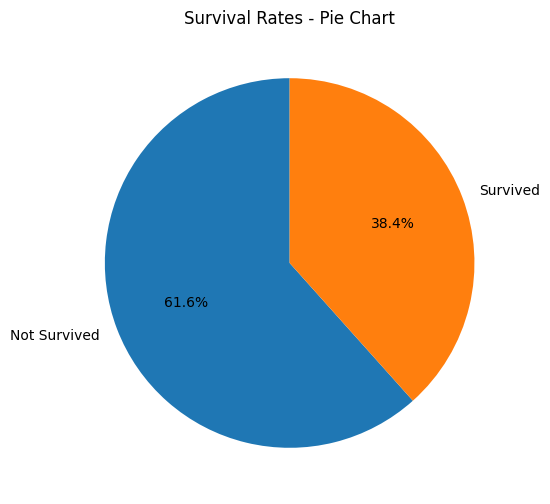

In [ ]:
pie_title = 'Survival Rates - Pie Chart'  #グラフのタイトル
pie_data = survival_counts                #グラフのデータ
pie_labels = ['Not Survived', 'Survived'] #グラフの表示ラベル
#pie_figsize = (12, 6)                    #グラフのサイズ

# 【実践】円グラフを表示してみましょう
ViewPieChart(pie_title, pie_data, pie_labels)

<h3>#2_2 : 棒グラフの表示</h3>

In [11]:
# 棒グラフを表示する場合は、以下のメソッドをコピーして使用
def ViewBarChart(title, data, x_labels, y_label, colors=[], figsize=(12, 6)):
  if len(colors) > 0:
    data.plot(
        kind='bar',  # グラフの種類を棒グラフに指定
        color=colors  # 各棒の色を指定
    )
  else:
    data.plot(
        kind='bar',  # グラフの種類を棒グラフに指定
    )

  plt.title(title)  # グラフのタイトルを設定

  # X軸の目盛り設定
  plt.xticks(
      ticks=list(range(0, len(data))),
      labels=x_labels,  # 各目盛りのラベルを設定
      rotation=0  # ラベルの回転角度を指定。ここでは回転させずに0度で表示
  )

  plt.ylabel(y_label)  # Y軸のラベルを設定

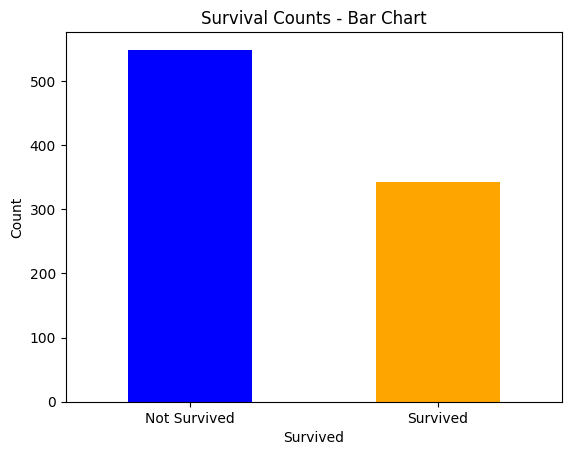

In [12]:
bar_title = 'Survival Counts - Bar Chart'   #グラフのタイトル
bar_data = survival_counts                  #グラフのデータ
bar_x_labels = ['Not Survived', 'Survived'] #グラフの表示ラベル
bar_y_label = 'Count'                       #グラフの表示ラベル
bar_colors = ['blue', 'orange']             #グラフの表示カラー
#bar_figsize = (12, 6)                      #グラフのサイズ

#ViewBarChart(bar_title, bar_data, bar_x_labels, bar_y_label)
ViewBarChart(bar_title, bar_data, bar_x_labels, bar_y_label, bar_colors)

In [13]:
# データの可視化を行うために、生存 or 死亡の情報が含まれている列の個数をカウントする(クロス集計をおこなう)
survival_counts = pd.crosstab(df['Sex'], df['Survived'])
print(survival_counts)

Survived    0    1
Sex               
female     81  233
male      468  109


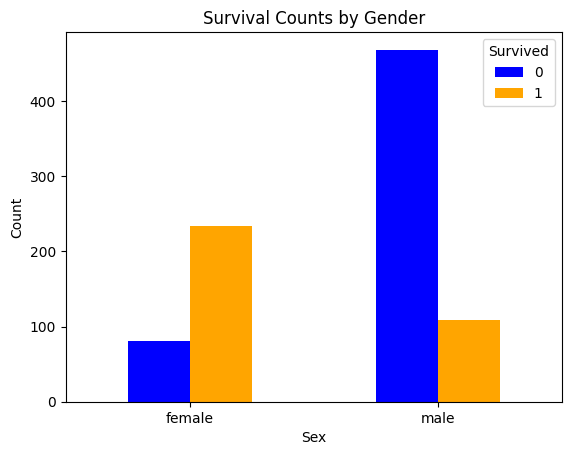

In [14]:
survival_counts = pd.crosstab(df['Sex'], df['Survived'])

bar_title = 'Survival Counts by Gender'       #グラフのタイトル
bar_data = survival_counts                    #グラフのデータ
bar_x_labels = survival_counts.index.tolist() #グラフの表示ラベル
bar_y_label = 'Count'                         #グラフの表示ラベル
bar_colors = ['blue', 'orange']               #グラフの表示カラー
#bar_figsize = (12, 6)                        #グラフのサイズ

# 【実践】二つの棒グラフを表示してみましょう
#ViewBarChart(bar_title, bar_data, bar_x_labels, bar_y_label)
ViewBarChart(bar_title, bar_data, bar_x_labels, bar_y_label, bar_colors)

<h3>#2_3 : 散布図</h3>

In [15]:
# 散布図を表示する場合は、以下のメソッドをコピーして使用
def ViewScatterPlot(title, df, x_label, y_label, figsize=(12, 6)):
  # 散布図の描画
  plt.figure(figsize=figsize)
  plt.scatter(
      df[x_label], df[y_label],  # X軸に年齢、Y軸に運賃をプロット
      alpha=0.5  #マーカーの透明度を50%に設定
  )
  plt.title(title)  # グラフのタイトル
  plt.xlabel(x_label)  # X軸のラベル
  plt.ylabel(y_label)  # Y軸のラベル
  plt.grid(True)  # グリッド線の表示

  # 相関係数の表示
  correlation = df[x_label].corr(df[y_label])  # 'Age'と'Fare'の相関係数を計算
  print("The correlation coefficient between " + str(x_label) + " and " + str(y_label) + " is " + str(round(correlation,2)))  # 計算結果を表示

  plt.show()  # グラフの表示

The correlation coefficient between Age and Fare is 0.1


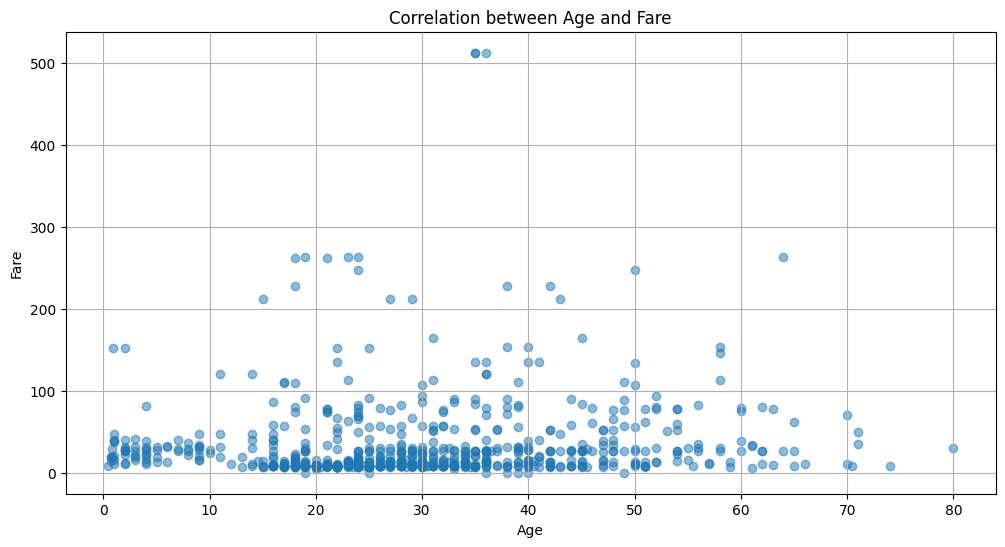

In [16]:
scatter_title = 'Correlation between Age and Fare'  #グラフのタイトル
scatter_data = df.dropna(subset=['Age', 'Fare'])    #グラフのデータ
scatter_x_label = 'Age'                             #グラフの表示ラベル
scatter_y_label = 'Fare'                            #グラフの表示ラベル
#scatter_figsize = (12, 6)                          #グラフのサイズ

ViewScatterPlot(scatter_title, scatter_data, scatter_x_label, scatter_y_label)

<h3>#2_4 : 箱ひげ図</h3>

In [17]:
# 箱ひげ図を表示する場合は、以下のメソッドをコピーして使用
def ViewBoxPlot(title, df, x_label, y_label, colors=[], figsize=(12, 6)):
  plt.figure(figsize=figsize)
  ax = sns.boxplot(
      x=x_label,  # X軸に性別を配置
      y=y_label,  # Y軸に年齢を配置
      hue='Survived',  # 生存状態によるカテゴリ分けを行い、色分け表示
      data=df,  # 使用するデータフレーム
      palette=colors  # カテゴリの色指定。非生存は青、生存はオレンジ
  )
  plt.title(title)  # グラフのタイトル
  plt.xlabel(x_label)  # X軸のラベル
  plt.ylabel(y_label)  # Y軸のラベル

  plt.show()

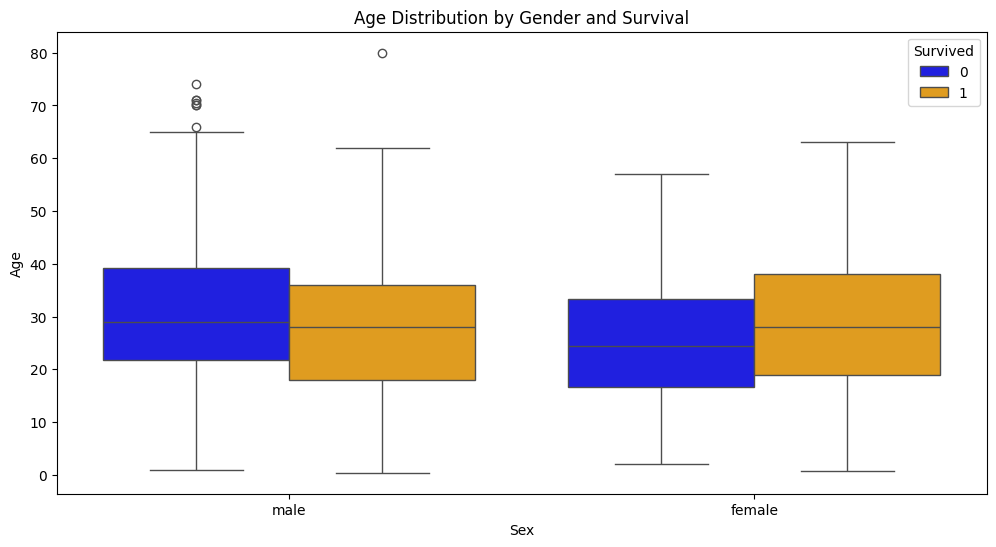

In [18]:
box_title = 'Age Distribution by Gender and Survival'   #グラフのタイトル
box_data = df                                          #グラフのデータ
box_x_label = 'Sex'                                     #グラフの表示ラベル
box_y_label = 'Age'                                     #グラフの表示ラベル
box_colors = ['blue', 'orange']                          #グラフの表示カラー
#scatter_figsize = (12, 6)                              #グラフのサイズ

ViewBoxPlot(box_title, box_data, box_x_label, box_y_label, box_colors)

<h2>#3 : データの前処理</h2>

<h3>#3_1 : 不要な列データの削除</h3>

<p>分析に利用しないデータ（列）を削除する</p>
<p>リストに削除する列名を指定することで複数列を同時に削除可能</p>



```
# df.drop()で指定の列または、行を削除する
# axis : 操作する方向を指定する（1で列の削除、0で行の削除）

df.drop(削除する列名リスト, axis=1).reset_index(drop=True)
```


In [19]:
drop_columns = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked']
df = df.drop(drop_columns, axis=1).reset_index(drop=True)

In [20]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.250
1,1,1,female,38.0,1,0,71.283
2,1,3,female,26.0,0,0,7.925
3,1,1,female,35.0,1,0,53.100
4,0,3,male,35.0,0,0,8.050
5,0,3,male,NaN,0,0,8.458
6,0,1,male,54.0,0,0,51.862
7,0,3,male,2.0,3,1,21.075
8,1,3,female,27.0,0,2,11.133
9,1,2,female,14.0,1,0,30.071


<h3>#3_2 : データ型変更</h3>

<p>データの型を変更する</p>

```
# df[列名]をすることで指定の列に対して操作が可能
# strで文字列型、intで数値型（整数）、floatで数値型（小数）に変更可能

df[列名].astype(データ型)
```


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [22]:
# 【実践】Pclassのデータを文字列型に変更してみましょう
df['Pclass'] = df['Pclass'].astype('str')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


<p>＜参考＞文字列型データを日付型データに変更する</p>

```
# 日付形式で記載されている文字列型の列は以下に沿ってデータ型に変更可能
# format : 変換元のデータ記述形式を指定（2024年6月17日 15時30分のような文字列を変更する場合は、format='%Y年%m月%d日 %H時%M分' と設定する）

pd.to_datetime(df[列名], format=元の記載型)
```


<h3>#3_2 : 欠損値を含む行の削除</h3>

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


<p>データ内に欠損値がある場合は何かしらの対応が必要になる可能性がある</p>
<p>対応としては以下が考えられる</p>
<ul>
  <li>欠損値がある行を削除する <-- 今回の対応</li>
  <li>欠損値がある列を削除する</li>
  <li>欠損値がある箇所を特定の値（平均値や直近の値など）で補完する</li>
  <li>欠損値をそのまま、Nullデータとして扱う</li>
</ul>

```
# 列名（または行名）リストを空白にすることですべての列（または行）に対して削除を行う
# how : 行または列を削除する際の条件を指定する（anyを指定すると一つでも欠損があれば削除、allを指定するとすべての値が欠損のとき削除）
# axis : 操作する方向を指定する（1で列の削除、0で行の削除）

df.dropna(列名（または行名）リスト, how='any', axis=0).reset_index(drop=True)
```


In [25]:
# 【実践】一つでも欠損値を含む行の削除をしてみましょう
df = df.dropna(how='any', axis=0).reset_index(drop=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    object 
 2   Sex       714 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     714 non-null    int64  
 5   Parch     714 non-null    int64  
 6   Fare      714 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 39.2+ KB


<p>＜参考＞欠損値を補完する</p>

```
# 特定の値で補完する
df[列名].fillna(0)

# 平均値で補完する
# .mean()の部分を変更することで、平均値以外の特徴量でも補完可能（.max():最大値、.median():中央値 など）
df[列名].fillna(df[列名].mean())

# 直前の値で補完する
# 必要に応じて行のソートが必要になる
# df.sort_values(列名, ascending=True) #ascending=True : 昇順（デフォルト）
df[列名].ffill()

# 直後の値で補完する
# 必要に応じて行のソートが必要になる
# df.sort_values(列名, ascending=False) #ascending=False : 降順
df[列名].bfill()

# カテゴリデータの最頻の文字列で補完する
# 複数個ある場合は .mode()[0] などを用いる
df[列名].fillna(df[列名].mode())
```

<h3>#3_3 : 新たな特徴量の生成（数値データのカテゴリ化）</h3>

<p>数値データを定数に分割し、カテゴリ変数に変更する</p>
<p>データの最小値〜最高値をn個に分割し、該当するカテゴリを返す</p>

```
# 分割を行う数を整数で指定する
pd.cat(df[列名], 分割数, label=False)
```

In [27]:
# 運賃を4分割してカテゴリ変数の特徴量を作成
df['FareBand'] = pd.cut(df['Fare'], 4, labels=False).astype('str')
# 年齢を4分割してカテゴリ変数の特徴量を作成
# 【実践】年齢を4分割してカテゴリ変数の特徴量を作成してみましょう
df['AgeBand'] = pd.cut(df['Age'], 4, labels=False).astype('str')

In [28]:
df[['Fare', 'FareBand', 'Age', 'AgeBand']].head(10)

,Fare,FareBand,Age,AgeBand
0,7.250,0,22.0,1
1,71.283,0,38.0,1
2,7.925,0,26.0,1
3,53.100,0,35.0,1
4,8.050,0,35.0,1
5,51.862,0,54.0,2
6,21.075,0,2.0,0
7,11.133,0,27.0,1
8,30.071,0,14.0,0
9,16.700,0,4.0,0


<h3>#3_4 : 新たな特徴量の生成（複数列の組み合わせ）</h3>

<p>複数の列を組み合わせて新たな特徴量の生成が可能</p>

In [29]:
# 家族何人で乗船しているかを特徴量化
# 【実践】ParchとSibspを足し算して一つの特徴量（FamilySize）を生成してみましょう
df['FamilySize'] = df['Parch'] + df['SibSp'] + 1

<h3>#3_5 : 新たな特徴量の生成（数値データのカテゴリ化 三項演算子）</h3>

<p>applyとlambda関数を使って、各行に対して特定の処理を実行する</p>

```
# 条件式内にr[列名]を指定することで、特定列に対して行事の値を使った処理が可能
# axis : 操作する方向を指定する（1で行の操作、0で列の操作）
df.apply(lambda r: 条件式がTrueの時の値 if 条件式 else 条件式がTrueの時の値, axis=1)
```

In [30]:
 # 一人での乗船か家族での乗船かを特徴量化
df['IsSingle'] = df.apply(lambda r: 0 if r['FamilySize'] > 0 else 1, axis=1)

 # 兄弟もしくは、配偶者と同乗しているかどうかを特徴量化
df['IsParch'] = df.apply(lambda r: 1 if r['Parch'] > 0 else 0, axis=1)

# 親または、子供と同乗しているかどうかを特徴量化
# 【実践】Sibspが1以上か未満かで分割し特徴量（IsSibsp）を生成してみましょう
df['IsSibSp'] = df.apply(lambda r: 1 if r['SibSp'] > 0 else 0, axis=1)

<h3>#3_6 : カテゴリ変数のワンホットベクトル化</h3>

<p>カテゴリ変数は機械が読み込み可能な形に変形する必要がある</p>

```
# データフレームをパラメータに渡すと、一括で変換可能
# dtypeから変換するデータの型を指定する
pd.get_dummies(df[列名リスト], dtype=int)
```

In [31]:
# 'Pclass', 'Sex', 'AgeBand', 'FareBand'のカテゴリ変数のデータを変換する
category_columns = ['Pclass', 'Sex', 'AgeBand', 'FareBand']

In [32]:
# onehotに変換する
# 【実践】上記のカラムをワンホットベクトル化したDataFrame（df_category）を作成してみましょう
df_category = pd.get_dummies(df[category_columns], dtype=int)

In [33]:
df_category.head()

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,AgeBand_0,AgeBand_1,AgeBand_2,AgeBand_3,FareBand_0,FareBand_1,FareBand_2,FareBand_3
0,0,0,1,0,1,0,1,0,0,1,0,0,0
1,1,0,0,1,0,0,1,0,0,1,0,0,0
2,0,0,1,1,0,0,1,0,0,1,0,0,0
3,1,0,0,1,0,0,1,0,0,1,0,0,0
4,0,0,1,0,1,0,1,0,0,1,0,0,0


<h3>#3_7 : 数値データの正規化・標準化</h3>

<p>数値データはデータの大小がモデルに影響を与えないように、データの幅を揃える必要があります</p>
<p>対応は以下の2つが考えられます</p>
<ul>
  <li>標準化（データを平均が0、分散が1になるように変換）：数字の最小・最大値が不明な場合は標準化を行う</li>
  <li>正規化（データを最小値0、最大値1に変換）：数字の最小・最大値が明確な場合は正規化を行う</li>
</ul>

<h4>標準化（データを平均が0、分散が1になるように変換）</h4>

In [34]:
# 'Age', 'Fare', 'FamilySize'の標準化する
num_columns = ['Age', 'Fare', 'FamilySize']

In [35]:
# 標準化する場合は、以下のメソッドをコピーして使用
def ConvertStandardScaler(df_num):
  ss = StandardScaler()
  ss.fit(df_num)
  ss.transform(df_num)
  return pd.DataFrame(ss.transform(df_num), columns = df_num.columns + '_ss')

In [36]:
# df['num_columns']で指定したカラムに絞ったデータフレームを変換する
df_ss = ConvertStandardScaler(df[num_columns])

In [37]:
df_ss.head(10)

,Age_ss,Fare_ss,FamilySize_ss
0,-0.530,-0.519,0.038
1,0.572,0.692,0.038
2,-0.255,-0.506,-0.637
3,0.365,0.348,0.038
4,0.365,-0.504,-0.637
5,1.674,0.325,-0.637
6,-1.908,-0.258,2.061
7,-0.186,-0.446,0.712
8,-1.081,-0.087,0.038
9,-1.770,-0.340,0.712


<h4>正規化（データを最小値0、最大値1に変換）</h4>

In [38]:
# 正規化する場合は、以下のメソッドをコピーして使用
def ConvertMinMaxScaler(df_num):
  mms = MinMaxScaler()
  mms.fit(df_num)
  mms.transform(df_num)
  return pd.DataFrame(mms.transform(df_num), columns = df_num.columns + '_mm')

In [ ]:
#df_mm = ConvertMinMaxScaler(df[num_columns])

<h3>#3_8 : データの結合</h3>

<p>複数のデータフレームを横結合する</p>

```
# axis=1で横結合、axis=0で縦結合
pd.concat(データフレームのリスト, axis=1)
```

In [39]:
# 元のデータ、作成した標準化データ、ワンホットベクトル化したデータを結合する
df_ml = pd.concat([df, df_ss, df_category], axis=1)

In [40]:
df_ml.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FareBand,AgeBand,FamilySize,IsSingle,IsParch,IsSibSp,Age_ss,Fare_ss,FamilySize_ss,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,AgeBand_0,AgeBand_1,AgeBand_2,AgeBand_3,FareBand_0,FareBand_1,FareBand_2,FareBand_3
0,0,3,male,22.0,1,0,7.250,0,1,2,0,0,1,-0.530,-0.519,0.038,0,0,1,0,1,0,1,0,0,1,0,0,0
1,1,1,female,38.0,1,0,71.283,0,1,2,0,0,1,0.572,0.692,0.038,1,0,0,1,0,0,1,0,0,1,0,0,0
2,1,3,female,26.0,0,0,7.925,0,1,1,0,0,0,-0.255,-0.506,-0.637,0,0,1,1,0,0,1,0,0,1,0,0,0
3,1,1,female,35.0,1,0,53.100,0,1,2,0,0,1,0.365,0.348,0.038,1,0,0,1,0,0,1,0,0,1,0,0,0
4,0,3,male,35.0,0,0,8.050,0,1,1,0,0,0,0.365,-0.504,-0.637,0,0,1,0,1,0,1,0,0,1,0,0,0
5,0,1,male,54.0,0,0,51.862,0,2,1,0,0,0,1.674,0.325,-0.637,1,0,0,0,1,0,0,1,0,1,0,0,0
6,0,3,male,2.0,3,1,21.075,0,0,5,0,1,1,-1.908,-0.258,2.061,0,0,1,0,1,1,0,0,0,1,0,0,0
7,1,3,female,27.0,0,2,11.133,0,1,3,0,1,0,-0.186,-0.446,0.712,0,0,1,1,0,0,1,0,0,1,0,0,0
8,1,2,female,14.0,1,0,30.071,0,0,2,0,0,1,-1.081,-0.087,0.038,0,1,0,1,0,1,0,0,0,1,0,0,0
9,1,3,female,4.0,1,1,16.700,0,0,3,0,1,1,-1.770,-0.340,0.712,0,0,1,1,0,1,0,0,0,1,0,0,0


<h3>#3_9 : トレーニングデータ、テストデータの分割</h3>

<p>分析モデルを作成するためにデータセットをトレーニングデータとテストデータに分割する</p>

```
# test_size : 学習データセットに分割比率を定義する
# randam_state : 乱数シード値（シード値を設定することで、関数の実行結果が常に同じになり、分析の再現性が保たれる）
X_train, X_test, y_train, y_test = train_test_split(説明変数のデータセット, 目的変数のデータセット, test_size=0より大きく1以下の小数値, random_state=任意の定数)
```

In [41]:
# 分析に使用するデータのカラム名を指定する
use_cols = [
    'Age_ss',
    'Fare_ss',
    'FamilySize_ss',
    'Pclass_1', 'Pclass_2', 'Pclass_3',
    'Sex_female', 'Sex_male',
    #'AgeBand_0', 'AgeBand_1', 'AgeBand_2', 'AgeBand_3', 'AgeBand_4',
    'AgeBand_0', 'AgeBand_1', 'AgeBand_2', 'AgeBand_3',
    #'FareBand_0', 'FareBand_1', 'FareBand_2', 'FareBand_4',
    'FareBand_0', 'FareBand_1', 'FareBand_2',
    'IsSingle',
    'IsParch',
    'IsSibSp'
]

In [42]:
X = df_ml[use_cols] # 説明変数となるデータ <-- use_colsで指定したデータを利用
y = df['Survived']  # 目的変数となるデータ <-- 今回は生存を予測する

In [43]:
# test_size : データの30%をテストデータセットとして使用し、残りの70%を学習データセットとして使用する
# 【実践】トレーニングデータ７：テストデータ３でデータを分割してみましょう
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

<h2>#4 : モデルの作成</h2>

<h3>決定木モデル</h3>

In [44]:
# 決定木モデルを作成する場合は、以下のメソッドをコピーして使用
def MakeTreeModel(X_train, y_train, depth=2, figsize=(12,6)):
  # 決定木モデルの初期化（インスタンス生成）
  # randam_state : 乱数シード値（シード値を設定することで、関数の実行結果が常に同じになり、分析の再現性が保たれる）
  # max_depth : 決定木の分割階層を定義できる。例えば、max_depth = 2だと2階層になる
  tree_model = DecisionTreeClassifier(random_state=99, max_depth=depth)

  # モデルのトレーニングを行う
  tree_model.fit(X_train, y_train)

  print(pd.Series(tree_model.feature_importances_, index=X_train.columns).sort_values(ascending=False))

  # 決定木アルゴリズムの可視化
  plt.figure(figsize=figsize)
  ax = plot_tree(tree_model, max_depth=depth ,feature_names=X_train.columns, filled=True)
  plt.show()

  return tree_model

Sex_female       0.504
Pclass_3         0.251
Age_ss           0.094
Pclass_1         0.065
FamilySize_ss    0.044
Fare_ss          0.042
FareBand_0       0.000
IsParch          0.000
IsSingle         0.000
FareBand_2       0.000
FareBand_1       0.000
AgeBand_1        0.000
AgeBand_3        0.000
AgeBand_2        0.000
AgeBand_0        0.000
Sex_male         0.000
Pclass_2         0.000
IsSibSp          0.000
dtype: float64


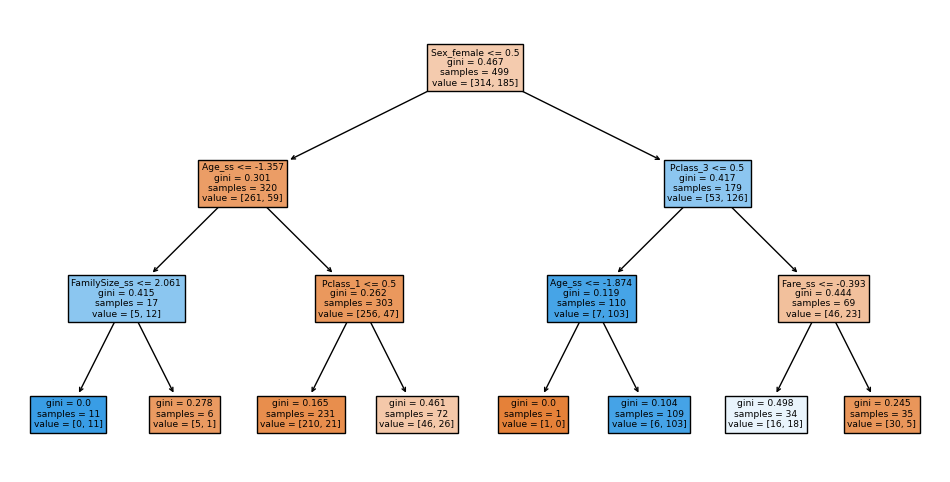

In [45]:
model_depth = 3 # 決定木の分割階層

tree_model = MakeTreeModel(X_train, y_train, model_depth)

#決定木モデル.predict(テストデータ) : 作成したモデルでデータを予測する
y_pred_tree = tree_model.predict(X_test)

<h3>LightGBM（二値分類モデル）</h3>

In [46]:
# LightGBMモデルを作成する場合は、以下のメソッドをコピーして使用
def MakeLGBModel_Class(X_train, y_train, objective='binary', metric='binary_logloss', figsize=(12,6)):
  #LightGBMで学習するためのデータ形式に変換
  dtrain = lgb.Dataset(X_train, y_train)

  #モデルパラメータの設定
  params = {'objective': objective,
            'metric' : metric,
            'verbose': -1}
  model_lgb = lgb.train(params,dtrain)
  # lightBGMモデルにおける重要特徴量を表示
  lgb.plot_importance(model_lgb, height=0.5, figsize=figsize, importance_type = "split")

  # 決定木アルゴリズムの可視化
  ax = lgb.plot_tree(model_lgb, tree_index=2, figsize=figsize, show_info=['split_gain'])
  plt.show()

  return model_lgb

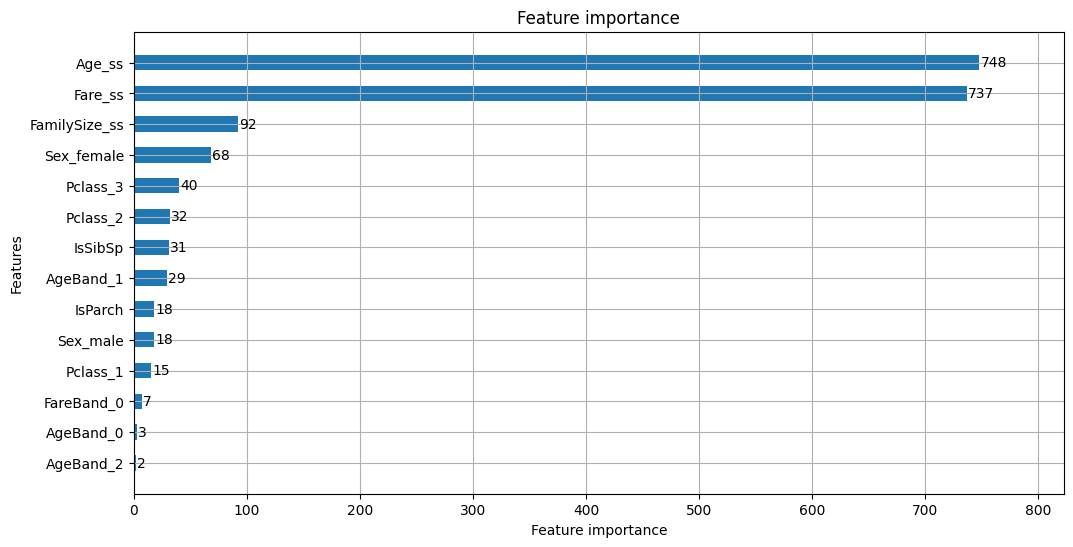

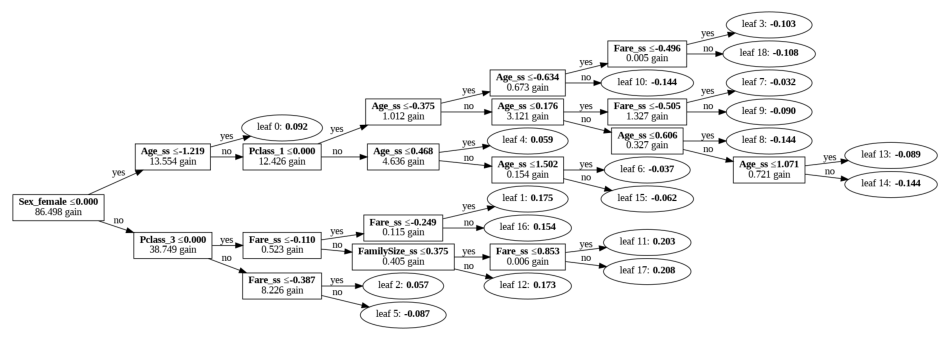

In [47]:
lgb_model = MakeLGBModel_Class(X_train, y_train)
# LightGBMモデル.predict(テストデータ) : 作成したモデルでデータを予測する
# 【実践】LightGBMモデルを使った予測をしてみましょう
y_pred_lgb = lgb_model.predict(X_test)

# 二値変換する（ステップ関数）: 0.5以上のものを1, それ以外を0に変換する
y_pred_lgb = [1  if x >= 0.5 else 0 for x in y_pred_lgb]

<h2>#5 : モデルの評価</h2>

<p>モデルは正解率以外にも複数の指標を持って有用性を判断する必要があります</p>
<ul>
  <li>正解率　：正解率は全体のデータから「Positive or Negative」という予測をした際、正しく予測できたデータの割合</li>
  <li>再現率　：実際にPositiveだったデータのうち、正しくPositiveと予測できた割合(TP/TP+FN)</li>
  <li>適合率　：Positiveと予測した全データのうち、正しくPositiveと予測できた割合(TP/TP+FP)</li>
  <li>F1スコア：適合率と再現率の調和平均を取った評価指標</li>
</ul>

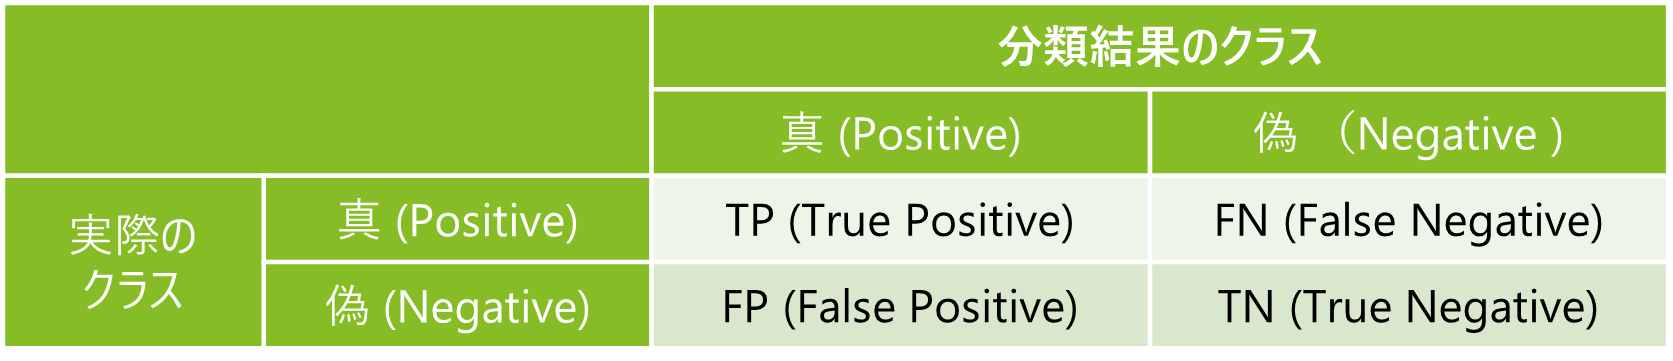

In [48]:
# モデルの評価をする場合は、以下のメソッドをコピーして使用
def Evaluation(y_test, y_pred):
    # survivedの列は、1:生存、0:死亡となっている

    # 正解率の計算
    accuracy = accuracy_score(y_test, y_pred)
    # 再現率の計算
    recall = recall_score(y_test, y_pred, pos_label=1)
    # 適合率の計算
    precision = precision_score(y_test, y_pred, pos_label=1)
    # F1スコアの計算
    f1 = f1_score(y_test, y_pred, pos_label=1)

    # 結果の出力（フォーマット文字列を使って、小数第四位で四捨五入した小数第三位までの計算結果を表示している）
    print(f'正解率: {accuracy:.3f}')
    print(f"再現率: {recall:.3f}")
    print(f"適合率: {precision:.3f}")
    print(f"F1スコア: {f1:.3f}")
    print('----------')

    # 混同行列
    # 引数のlabelを用いて、TPに生存が正しく予測されている個数、TNに死亡が正しく予測されている個数が表示されるように、混合行列を定義
    cf_mat = confusion_matrix(y_test, y_pred, labels=[1, 0])
    print('混同行列')
    print(cf_mat)

In [49]:
# 決定木モデルの評価
Evaluation(y_test, y_pred_tree)

正解率: 0.772
再現率: 0.619
適合率: 0.878
F1スコア: 0.726
----------
混同行列
[[ 65  40]
 [  9 101]]


In [50]:
# LightGBMモデルの評価
# 【実践】LightGBMモデルの評価をしてみましょう
Evaluation(y_test, y_pred_lgb)

正解率: 0.772
再現率: 0.657
適合率: 0.841
F1スコア: 0.738
----------
混同行列
[[69 36]
 [13 97]]


<h2>参考</h2>

<h3>予測モデルの作成（回帰分析）</h3>

<p>以下、参考として回帰モデルの利用方法を示します</p>
<p>前述のような0,1を予測するモデルを分類モデルといいます</p>
<p>連続値を予測する場合、回帰分析を用います</p>
<p>LightBGMの回帰モデルと線形回帰モデルのサンプル及び、モデル評価のサンプルコードになります</p>

<h3>LightGBM（回帰モデル）</h3>

In [ ]:
# LightGBMモデルを作成する場合は、以下のメソッドをコピーして使用
def MakeLGBModel_Reg(X_train, y_train, objective='regression', metric='rmse', figsize=(12, 6)):
  #LightGBMで学習するためのデータ形式に変換
  dtrain = lgb.Dataset(X_train, y_train)

  #モデルパラメータの設定
  params = {'objective': objective,
            'metric' : metric}
  model_lgb = lgb.train(params,dtrain)
  # lightBGMモデルにおける重要特徴量を表示
  lgb.plot_importance(model_lgb, height=0.5, figsize=figsize, importance_type = "split")

  # 決定木アルゴリズムの可視化
  ax = lgb.plot_tree(model_lgb, tree_index=2, figsize=figsize, show_info=['split_gain'])
  plt.show()

  return model_lgb

In [ ]:
lgb_model = MakeLGBModel_Reg(X_train, y_train)
# LightGBMモデル.predict(テストデータ) : 作成したモデルでデータを予測する
y_pred_lgb = lgb_model.predict(X_test)

<h3>線形回帰</h3>

In [ ]:
# 線形回帰モデルを作成する場合は、以下のメソッドをコピーして使用
def MakeLinearRegressionModel(X_train, y_train):
  # 線形回帰モデルを作成
  model = LinearRegression()
  # 訓練データでモデルを学習
  model.fit(X_train, y_train)]

  # 係数をDataFrameとして取得
  coefficients = pd.DataFrame(model.coef_, index=X_train.columns, columns=['Coefficient'])
  print(coefficients.abs().sort_values(by='Coefficient', ascending=False))

  return model

In [ ]:
lr_model = MakeLinearRegressionModel(X_train, y_train)
# 線形回帰モデル.predict(テストデータ) : 作成したモデルでデータを予測する
y_pred_lr = lr_model.predict(X_test)

モデルの評価

<p>回帰分析のモデル評価</p>
<p>RMSE : 正解データとの距離を示す値です（0に近いほど精度が高いデータといえます）</p>

In [ ]:
def Evaluation_Reg(y_test, y_pred, figsize=(12, 6)):
    # 決定係数 (R^2) を計算
    # r2 = r2_score(y_test, y_pred)
    # RMSE (平均二乗誤差の平方根) を計算
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # 結果を表示
    # print(f'決定係数: {r2:.4f}')
    print(f'RMSE: {rmse:.4f}')


    yaxis = y_pred # 線形回帰
    xaxis = y_test

    # 散布図の作成
    plt.figure(figsize=figsize)
    plt.scatter(xaxis, yaxis, color='blue')
    plt.plot([min(xaxis.min(), yaxis.min()), max(xaxis.max(), yaxis.max())],
            [min(xaxis.min(), yaxis.min()), max(xaxis.max(), yaxis.max())],
            color='red', linestyle='--', linewidth=2, label='Ideal Prediction Line')

    plt.title('Scatter Plot of Both model Prediction')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
Evaluation(y_test, y_pred_lgb)

In [ ]:
Evaluation(y_test, y_pred_lr)